In [228]:
import numpy as np
import pandas as pd
#pip install pycountry-convert
import pycountry_convert as pc
import matplotlib.pyplot as plt
import folium

#!pip install folium

In [187]:
# Fetching the data
df_confirmed=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv", parse_dates=['Last_Update'])

In [188]:
#df_confirmed.head()
df_confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851


In [189]:
df_confirmed=df_confirmed.rename(columns={'Province/State':'state',"Country/Region":'country' })
df_deaths=df_deaths.rename(columns={'Province/State':'state',"Country/Region":'country' })
df_covid19=df_covid19.rename(columns={"Country_Region":"country"})
df_table=df_table.rename(columns={'Country_Region':"country"})
df_covid19['active']=df_covid19['Confirmed']-df_covid19['Recovered']-df_covid19['Deaths']

In [190]:
df_confirmed.loc[df_confirmed['country']=="US", "country"]=="USA"
df_deaths.loc[df_deaths['country']=="US", "country"]=="USA"
df_covid19.loc[df_covid19['country']=="US", "country"]=="USA"
df_table.loc[df_table['country']=='US',"country" ]=="USA"


df_confirmed.loc[df_confirmed['country']=="Korea, South", "country"]=="South Korea"
df_deaths.loc[df_deaths['country']=="Korea, South", "country"]=="South Korea"
df_covid19.loc[df_covid19['country']=="Korea, South", "country"]=="South Korea"
df_table.loc[df_table['country']=='Korea, South',"country" ]=="South Korea"

df_confirmed.loc[df_confirmed['country']=="Taiwan*", "country"]=="Taiwan"
df_deaths.loc[df_deaths['country']=="Taiwan*", "country"]=="Taiwan"
df_covid19.loc[df_covid19['country']=="Taiwan*", "country"]=="Taiwan"
df_table.loc[df_table['country']=='Taiwan*',"country" ]=="Taiwan"

df_confirmed.loc[df_confirmed['country']=="Congo (Kinshasa)", "country"]=="Democratic Republic of the Congo"
df_deaths.loc[df_deaths['country']=="Congo (Kinshasa)", "country"]=="Democratic Republic of the Congo"
df_covid19.loc[df_covid19['country']=="Congo (Kinshasa)", "country"]=="Democratic Republic of the Congo"
df_table.loc[df_table['country']=='Congo (Kinshasa)',"country" ]=="Democratic Republic of the Congo"

df_confirmed.loc[df_confirmed['country']=="Reunion", "country"]=="Réunion"
df_deaths.loc[df_deaths['country']=="Reunion", "country"]=="Réunion"
df_covid19.loc[df_covid19['country']=="Reunion", "country"]=="Réunion"
df_table.loc[df_table['country']=='Reunion',"country" ]=="Réunion"

df_confirmed.loc[df_confirmed['country']=="Cote d'Ivoire", "country"]=="Côte d'Ivoire"
df_deaths.loc[df_deaths['country']=="Cote d'Ivoire", "country"]=="Côte d'Ivoire"
df_covid19.loc[df_covid19['country']=="Cote d'Ivoire", "country"]=="Côte d'Ivoire"
df_table.loc[df_table['country']=="Cote d'Ivoire","country" ]=="Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country']=="Bahamas, The", "country"]=="Bahamas"
df_deaths.loc[df_deaths['country']=="Bahamas, The", "country"]=="Bahamas"
df_covid19.loc[df_covid19['country']=="Bahamas, The", "country"]=="Bahamas"
df_table.loc[df_table['country']=='Bahamas, The',"country" ]=="Bahamas"

df_confirmed.loc[df_confirmed['country']=="Gambia, The", "country"]=="Gambia"
df_deaths.loc[df_deaths['country']=="Gambia, The", "country"]=="Gambia"
df_covid19.loc[df_covid19['country']=="Gambia, The", "country"]=="Gambia"
df_table.loc[df_table['country']=='Gambia, The',"country" ]=="Gambia"


Series([], Name: country, dtype: bool)

In [191]:
countries=np.asarray(df_confirmed['country'])
countries1=np.asarray(df_covid19['country'])

In [192]:
continents= {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [193]:
def country_to_continent(country):
    try:
        return pc.convert_country_alpha2_to_continent_code(pc.map_country_name_to_country_alpha2(country))
    except:
        return 'na'
        

In [194]:
df_confirmed.insert(2, "continent", [continents[country_to_continent(country)] for country in countries[:]])
df_covid19.insert(1, "continent", [continents[country_to_continent(country)] for country in countries1[:]])

In [195]:
df_confirmed[df_confirmed['continent']!= "Others"]

,state,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20


In [196]:
df_covid19.columns

Index(['country', 'continent', 'Last_Update', 'Lat', 'Long_', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'active'],
      dtype='object')

## Country wise Analysis

In [197]:
df_countries_cases=df_covid19.copy().drop(["Lat", "Long_", "continent","Last_Update"], axis=1)
df_countries_cases.index=df_countries_cases['country']
df_countries_cases=df_countries_cases.drop('country', axis=1)

In [198]:
df_countries_cases

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,active
country,,,,,,,,,,,
Australia,11441.0,118.0,8160.0,3163.0,44.937686,NaN,NaN,1.031378,36,AUS,3163.0
Austria,19439.0,711.0,17335.0,1393.0,215.835406,NaN,NaN,3.657596,40,AUT,1393.0
Canada,111559.0,8884.0,98281.0,4395.0,294.695367,NaN,NaN,7.963499,124,CAN,4394.0
China,85314.0,4644.0,80018.0,652.0,6.073570,NaN,NaN,5.443421,156,CHN,652.0
Denmark,13374.0,611.0,12410.0,353.0,230.896604,NaN,NaN,4.568566,208,DNK,353.0
...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,7764.0,53.0,1492.0,6219.0,152.193038,NaN,NaN,0.682638,275,PSE,6219.0
Western Sahara,10.0,1.0,8.0,1.0,1.674116,NaN,NaN,10.000000,732,ESH,1.0
Yemen,1576.0,440.0,695.0,441.0,5.283986,NaN,NaN,27.918782,887,YEM,441.0


In [199]:
df_countries_cases=df_countries_cases.iloc[:,[0,1,2,3,7]]

In [200]:
df_countries_cases

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
country,,,,,
Australia,11441.0,118.0,8160.0,3163.0,1.031378
Austria,19439.0,711.0,17335.0,1393.0,3.657596
Canada,111559.0,8884.0,98281.0,4395.0,7.963499
China,85314.0,4644.0,80018.0,652.0,5.443421
Denmark,13374.0,611.0,12410.0,353.0,4.568566
...,...,...,...,...,...
West Bank and Gaza,7764.0,53.0,1492.0,6219.0,0.682638
Western Sahara,10.0,1.0,8.0,1.0,10.000000
Yemen,1576.0,440.0,695.0,441.0,27.918782


In [201]:
df_countries_cases=df_countries_cases.groupby(['country']).sum()

In [202]:
df_countries_cases.sort_values('Confirmed', ascending=False)[:5]

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
country,,,,,
US,3641539.0,139176.0,1107204.0,2439843.0,3.821901
Brazil,2046328.0,77851.0,1428520.0,539957.0,3.804424
India,1003832.0,25602.0,635757.0,342473.0,2.550427
Russia,758001.0,12106.0,538467.0,207428.0,1.597096
Peru,345537.0,12799.0,233982.0,98756.0,3.704090


In [204]:
df_covid19.head()

,country,continent,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,active
0,Australia,Others,2020-07-18 02:35:01,-25.0000,133.0000,11441.0,118.0,8160.0,3163.0,44.937686,NaN,NaN,1.031378,36,AUS,3163.0
1,Austria,Others,2020-07-18 02:35:01,47.5162,14.5501,19439.0,711.0,17335.0,1393.0,215.835406,NaN,NaN,3.657596,40,AUT,1393.0
2,Canada,Others,2020-07-18 02:35:01,60.0010,-95.0010,111559.0,8884.0,98281.0,4395.0,294.695367,NaN,NaN,7.963499,124,CAN,4394.0
3,China,Others,2020-07-18 02:35:01,30.5928,114.3055,85314.0,4644.0,80018.0,652.0,6.073570,NaN,NaN,5.443421,156,CHN,652.0
4,Denmark,Others,2020-07-18 02:35:01,56.2639,9.5018,13374.0,611.0,12410.0,353.0,230.896604,NaN,NaN,4.568566,208,DNK,353.0


### Top 10 countries Confirmed Cases

Text(0.5, 1.0, 'Top 10 Countries (Confirmed Cases)')

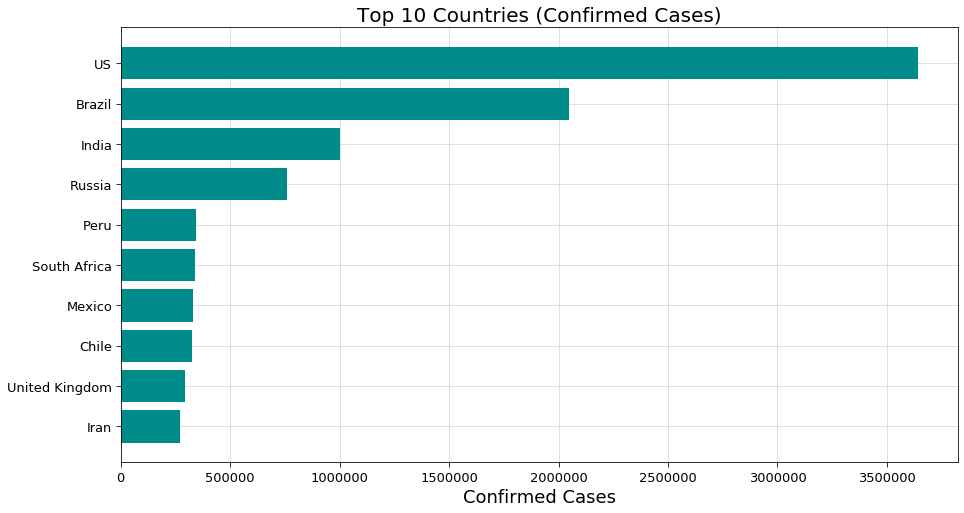

In [217]:
f=plt.figure(figsize=(15,8))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')['Confirmed'].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.grid(alpha=0.5)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries Confirmed Cases",fontsize=20)

Text(0.5, 1.0, 'Top 10 Countries Deaths Cases')

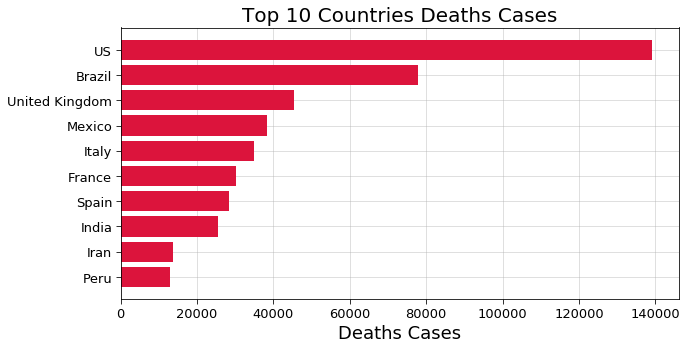

In [220]:
f=plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')['Deaths'].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.grid(alpha=0.5)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries Deaths Cases",fontsize=20)

In [229]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map


In [ ]:
Deaths